In [43]:
import numpy as np # per operazioni numeriche.
from keras.datasets import mnist # per caricare il dataset.
from keras.models import Sequential # per costruire il modello sequenziale.
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D # per aggiungere strati al modello.
from keras.utils import to_categorical # per convertire le etichette in formato one-hot
import matplotlib.pyplot as plt  # per visualizzare i dati


In [44]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


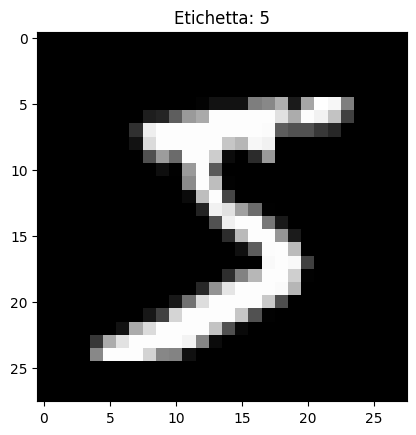

In [45]:
plt.imshow(X_train[0], cmap='gray')
plt.title(f'Etichetta: {y_train[0]}')
plt.show()

In [46]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255


In [47]:
# X_train = X_train.reshape(-1, 28*28)
# X_test = X_test.reshape(-1, 28*28)

In [48]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [49]:
model = Sequential()

In [ ]:
model = Sequential()

# Feature Learning block:
model.add(Conv2D(24, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(36, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

# Classification block:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [51]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("\nModello compilato con successo.")

print("\nInizia l'addestramento del modello...")


Modello compilato con successo.

Inizia l'addestramento del modello...


In [52]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.1)

print("\nAddestramento del modello completato. \nVisualizzo metriche di accuracy sul test set:\n")

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8850 - loss: 0.3742 - val_accuracy: 0.9817 - val_loss: 0.0595
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9832 - loss: 0.0536 - val_accuracy: 0.9905 - val_loss: 0.0357
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9900 - loss: 0.0311 - val_accuracy: 0.9887 - val_loss: 0.0411
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9929 - loss: 0.0233 - val_accuracy: 0.9888 - val_loss: 0.0414
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9943 - loss: 0.0163 - val_accuracy: 0.9902 - val_loss: 0.0356
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9963 - loss: 0.0116 - val_accuracy: 0.9908 - val_loss: 0.0404
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9962 - loss: 0.0109 - val_accuracy: 0.9888 - val_loss: 0.0467
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9967 - loss: 0.0092 - 

In [53]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Perdita sul test set: {test_loss:.4f}')
print(f'Accuratezza sul test set: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9883 - loss: 0.0375   
Perdita sul test set: 0.0313
Accuratezza sul test set: 0.9911


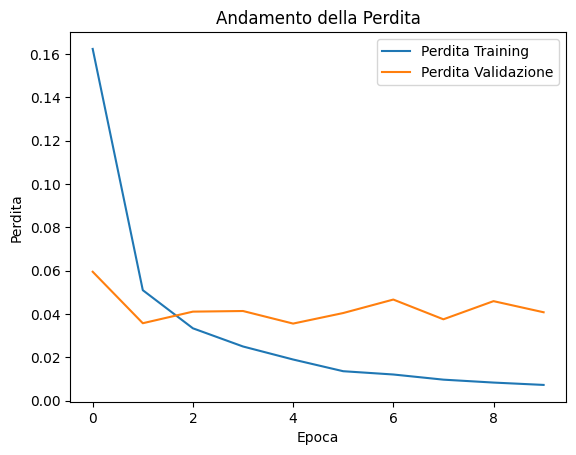

In [54]:
plt.plot(history.history['loss'],
label='Perdita Training')
plt.plot(history.history['val_loss']
, label='Perdita Validazione')
plt.xlabel('Epoca')
plt.ylabel('Perdita')
plt.legend()
plt.title('Andamento della Perdita')
plt.show()


In [55]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [56]:
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

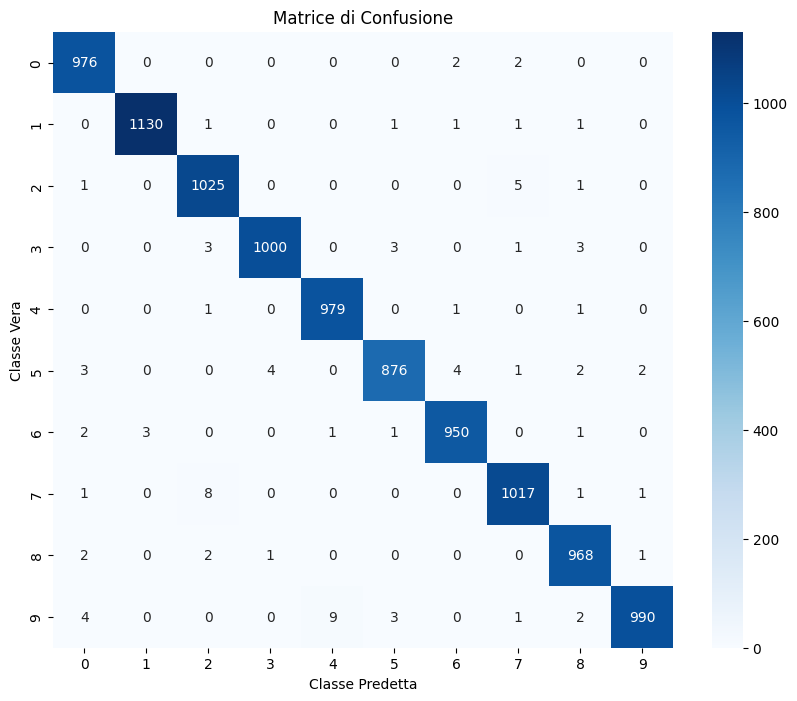

In [58]:
conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice di Confusione')
plt.xlabel('Classe Predetta')
plt.ylabel('Classe Vera')
plt.show()

In [59]:
from sklearn.metrics import classification_report

report = classification_report(true_classes, predicted_classes)
print('Report di Classificazione:')
print(report)

Report di Classificazione:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



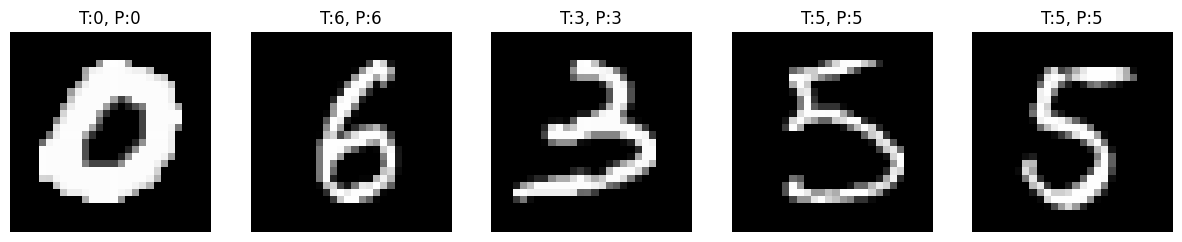

In [60]:
num_images = 5
random_indices = np.random.choice(len(X_test), num_images)
plt.figure(figsize=(15,3))
for i, idx in enumerate(random_indices):
    image = X_test[idx].reshape(28, 28)
    true_label = true_classes[idx]
    predicted_label = predicted_classes[idx]

    plt.subplot(1, num_images, i+1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(f'T:{true_label}, P:{predicted_label}')
plt.show()